In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 경사하강법 y=wX+b , w결정
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.5 #임의 값

# LinearRegression

# 단순선형회귀

<Figure size 600x1000 with 0 Axes>

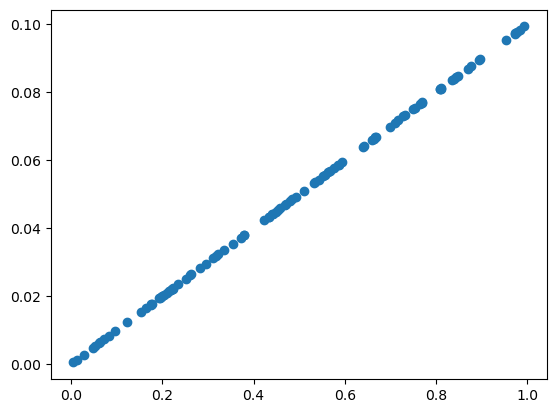

In [3]:
X = np.random.rand(100)
y = 0.2*X*0.5
plt.scatter(X,y)
plt.Figure(figsize=(6,10))

In [4]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [5]:
# 경사하강법 : y=wX+b
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate # 학습률 : (기본값 : 0.5)

0.5

epoch 0, W: -0.2849, Error: 0.9867


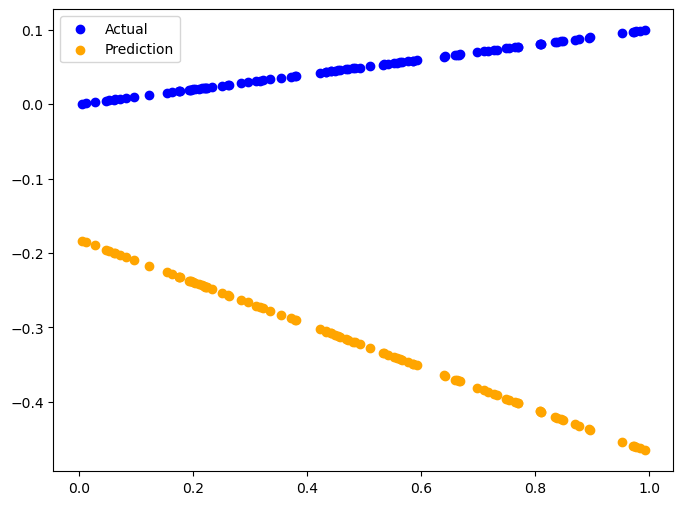

epoch 10, W: -0.0684, Error: 0.0418


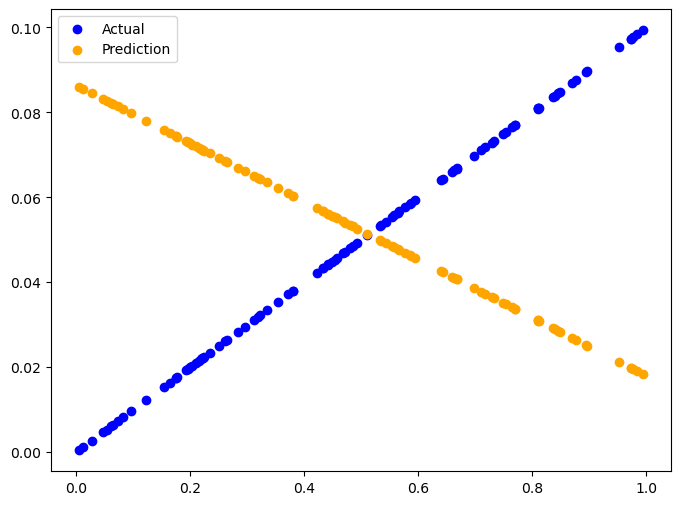

epoch 20, W: -0.0228, Error: 0.0305


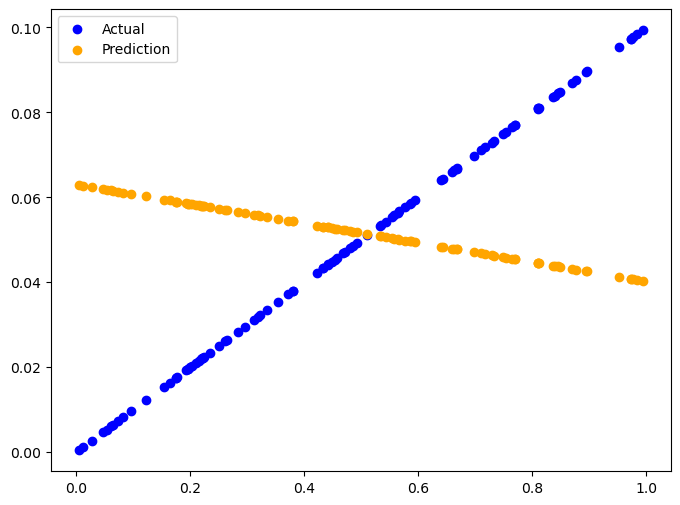

epoch 30, W: 0.0104, Error: 0.0223


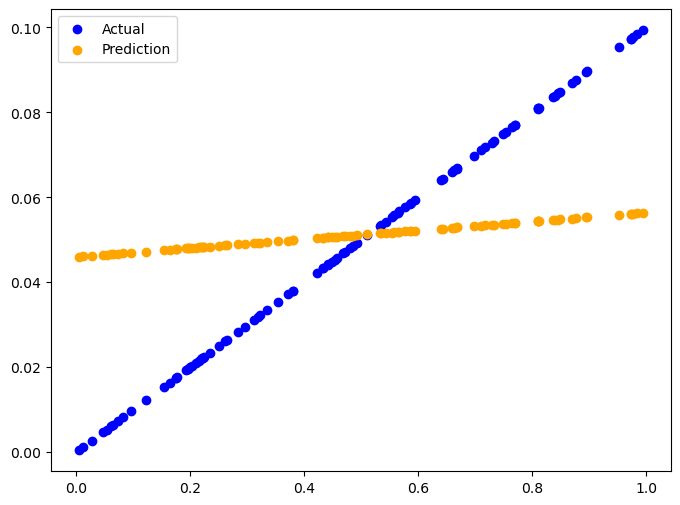

epoch 40, W: 0.0346, Error: 0.0162


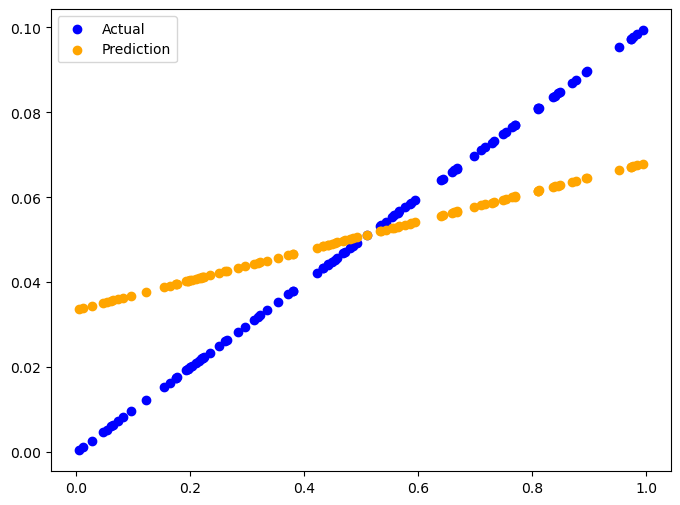

epoch 50, W: 0.0523, Error: 0.0118


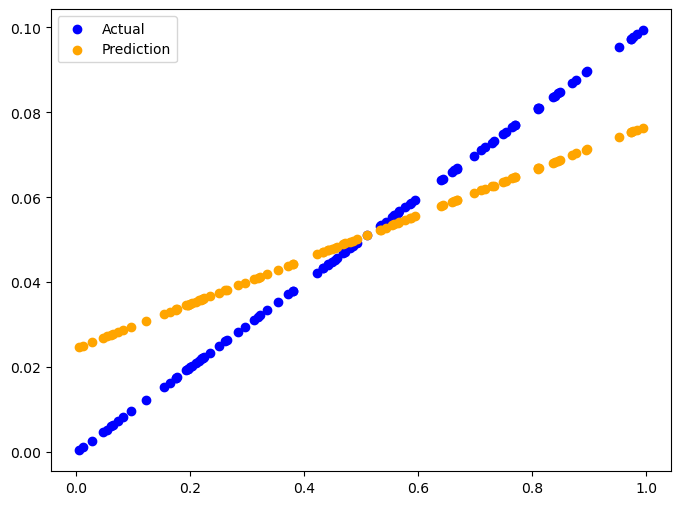

epoch 60, W: 0.0652, Error: 0.0086


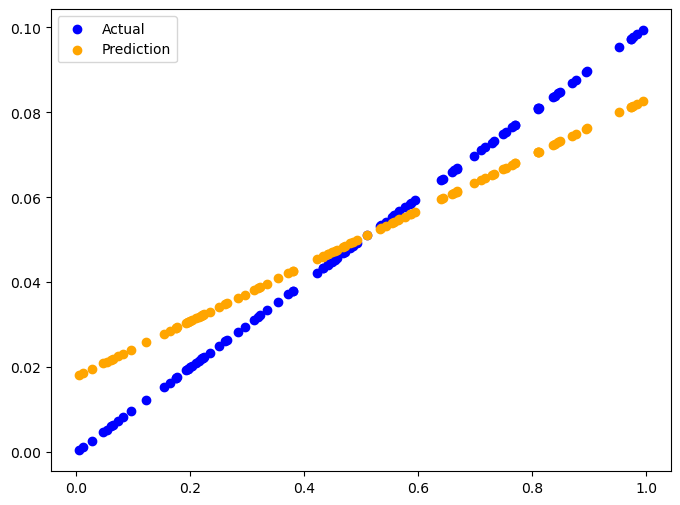

epoch 70, W: 0.0746, Error: 0.0063


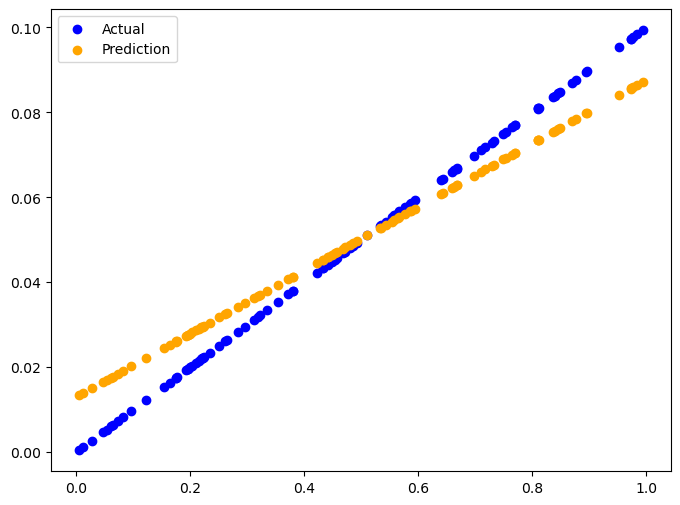

epoch 80, W: 0.0815, Error: 0.0046


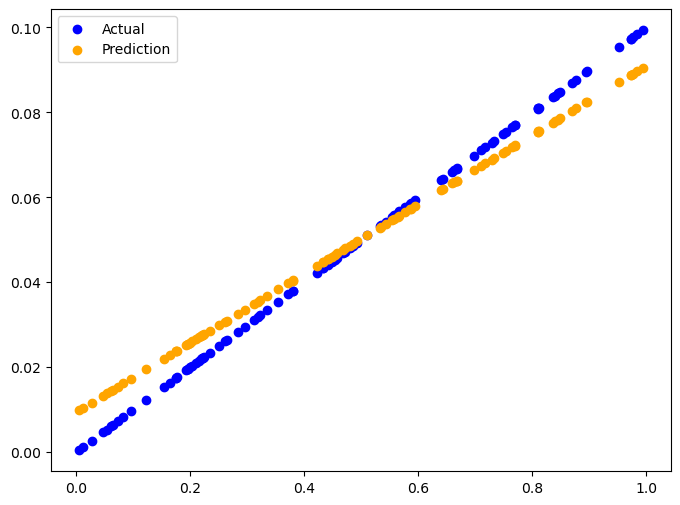

epoch 90, W: 0.0865, Error: 0.0034


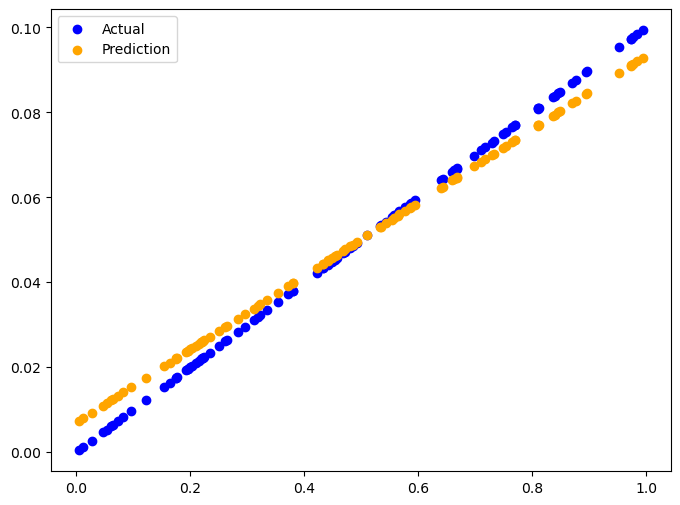

In [6]:
for epoch in range(100):
  y_pred = W * X + b
  error = np.abs(y_pred - y).mean() #평균절대오차:MAE
  if error < 0.001 :
    break
  #경사하강법에 의한 W,b의 조정
  W_descent = learning_rate * ((y_pred - y)*X).mean()
  b_descent = learning_rate * ((y_pred - y)).mean()
  W = W - W_descent
  b = b - b_descent
  
  #10epoch마다 시각화
  if epoch%10 == 0 :
    print (f'epoch {epoch}, W: {W:.4f}, Error: {error:.4f}')
    y_pred = W * X + b
    plt_prediction(y_pred, y)

## housing 데이터

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
from sklearn.datasets import fetch_california_housing

In [9]:
house = fetch_california_housing()
house_df = pd.DataFrame(house.data, columns=house.feature_names)
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
#target
house_df['Price'] = house.target
house_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='str')

In [11]:
house_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
house_df['Price'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Price, dtype: float64

## 데이터 분할

In [13]:
X=house_df.drop('Price', axis=1).values
y=house_df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## LinearRegression 모델

In [14]:
house_lr = LinearRegression()
house_lr.fit(X_train, y_train)
y_pred = house_lr.predict(X_test)
y_pred[:10], y_test[:10]

(array([0.72604907, 1.76743383, 2.71092161, 2.83514727, 2.60695807,
        2.01073856, 2.64067386, 2.16706161, 2.74012056, 3.90361526]),
 array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]))

# 평가

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse, rmse

(0.5305677824766759, np.float64(0.7284008391515456))

In [16]:
r2_score(y_test, y_pred)

0.5957702326061659

In [17]:
house_lr

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
house_lr.coef_, house_lr.intercept_

(array([ 4.45822565e-01,  9.68186799e-03, -1.22095112e-01,  7.78599557e-01,
        -7.75740400e-07, -3.37002667e-03, -4.18536747e-01, -4.33687976e-01]),
 np.float64(-37.05624133152509))

In [19]:
pd.Series(data = np.round(house_lr.coef_,1), index=house_df.drop('Price', axis=1).columns).sort_values(ascending=False)

AveBedrms     0.8
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

## 피처 정리(엔지니어링), 전처리
- 다항회귀, 규제 적용(W에)

# 다항회귀모델

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [28]:
model_poly = Pipeline([('Poly',PolynomialFeatures(degree=2, include_bias=False)),('linear', LinearRegression())])
model_poly.fit(X_train,y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('Poly', ...), ('linear', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


In [29]:
poly_pred = model_poly.predict(X_test)
mean_squared_error(y_test, poly_pred)

0.4549723374747758

In [30]:
r2_score(y_test, poly_pred)

0.6533650021311979

In [24]:
# 테스트하고 싶은 차수 리스트
degrees = [1, 2, 3, 4]

for degree in degrees:
    # 1. 파이프라인 구성 (전처리: PolynomialFeatures -> 모델: LinearRegression)
    model_poly = Pipeline([
        ('Poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])
    
    # 2. 모델 학습
    model_poly.fit(X_train, y_train)
    
    # 3. 예측 및 성능 평가
    y_train_pred = model_poly.predict(X_train)
    y_test_pred = model_poly.predict(X_test)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"Degree {degree}:")
    print(f"  - Train R2 Score: {train_r2:.4f}")
    print(f"  - Test R2 Score: {test_r2:.4f}")
    print("-" * 30)

Degree 1:
  - Train R2 Score: 0.6093
  - Test R2 Score: 0.5958
------------------------------
Degree 2:
  - Train R2 Score: 0.6838
  - Test R2 Score: 0.6534
------------------------------
Degree 3:
  - Train R2 Score: 0.7317
  - Test R2 Score: -2.0788
------------------------------
Degree 4:
  - Train R2 Score: 0.7065
  - Test R2 Score: -67.2965
------------------------------


In [31]:
from sklearn.linear_model import Ridge

# 3. 릿지 회귀
ridge = Ridge(alpha=1.0)  # alpha는 규제 강도
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

print("\n[릿지 회귀]")
print("MSE:", mean_squared_error(y_test, pred_ridge))
print("R2:", r2_score(y_test, pred_ridge))


[릿지 회귀]
MSE: 0.5305052690933699
R2: 0.5958178603951636


In [32]:
from sklearn.linear_model import Lasso
# 4. 라쏘 회귀

lasso = Lasso(alpha=0.1)  # alpha 값 작으면 규제 약해짐
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

print("\n[라쏘 회귀]")
print("MSE:", mean_squared_error(y_test, pred_lasso))
print("R2:", r2_score(y_test, pred_lasso))


[라쏘 회귀]
MSE: 0.5970512258509185
R2: 0.5451177283676661


In [34]:
from sklearn.linear_model import ElasticNet

In [35]:
# 5. 엘라스틱넷 회귀
model_enet = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio=0.5: L1과 L2의 비중 50:50
model_enet.fit(X_train, y_train)
pred_enet = model_enet.predict(X_test)

print("\n[엘라스틱넷 회귀]")
print("MSE:", mean_squared_error(y_test, pred_enet))
print("R2:", r2_score(y_test, pred_enet))


[엘라스틱넷 회귀]
MSE: 0.5571449056777037
R2: 0.5755216146456115
